# Sonyc Peak Time Analysis

**Cowork by Xurui Chen and Pengzi Li**

[Peak Time Search](#Peak_Time_Search)

[Peak Hour Noise](#Peak_Hour_Noise)

05.01 notes:

1 coordinate 20-minute noise measurements during three peak traffic times (AM peak, midday, and PM peak) >> tell the transportation team the exact time sloths you chose so they are on the same page as you

- aggregate / group by timestamp to get mean noise per time stamp. do that both for the whole data set and for weekdays / weekends

- label “am peak”, “midday”, “pm peak” to timestamps within the selected timesloths. then create 3 new df’s for each peak

- create a new column to translate 8:00 == 0, 8:01 == 1… etc  to be able to later plot the three df’s on a one timeline

- plot the three peak hours noise data (try both raw and per minute) for a 20 min window

2 Plot each peak noise and count trucks


In [3]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import ipywidgets as widgets
import matplotlib.dates as mdates
import matplotlib

In [4]:
matplotlib.rcParams['timezone'] = 'America/New_York'
df = pd.read_csv('sonycnode-b827eb491436.sonyc.csv')

In [5]:
df['time'] = pd.to_datetime(df['timestamp'].values.astype(np.int64), unit='s')
df['time'] = df['time'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)
df.drop(['time', 'timestamp'], axis=1, inplace=True)

In [6]:
df['weekday'] = df.index.weekday
df['min_of_day'] = (df.index.hour * 60.0) + df.index.minute
df['hour_of_day'] = df.index.hour

In [7]:
df.head()

,dBAS,weekday,min_of_day,hour_of_day
time,,,,
2019-04-11 11:14:09-04:00,64.35,3,674.0,11
2019-04-11 11:14:10-04:00,65.92,3,674.0,11
2019-04-11 11:14:11-04:00,69.24,3,674.0,11
2019-04-11 11:14:12-04:00,71.78,3,674.0,11
2019-04-11 11:14:13-04:00,70.70,3,674.0,11


## Peak_Time_Search

In [8]:
def calc_leq(data):
    return 10 * np.log10(np.mean(10 ** (data / 10)))

Plot the mean dBAS changes through the day

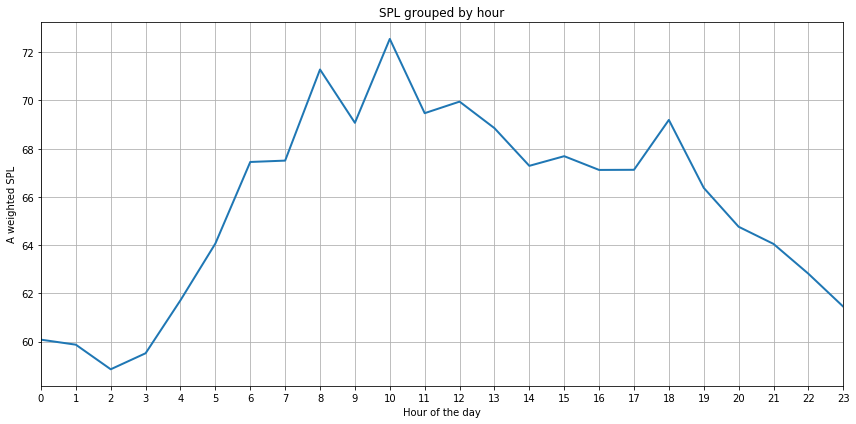

In [10]:
df_gb = df.groupby(df['hour_of_day'])['dBAS'].apply(calc_leq)

plt.figure(figsize=(12,6))
ax = sns.lineplot(x=df_gb.index, y=df_gb, linewidth=2)

plt.xlim([df_gb.index.min(), df_gb.index.max()])
plt.title('SPL grouped by hour')
plt.xlabel('Hour of the day')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('A weighted SPL')
plt.tight_layout()
plt.grid()

In [11]:
wkday_df = df.loc[df['weekday'] < 5]
wkend_df = df.loc[df['weekday'] > 4]

Plot the mean dBAS changes through the day weekend vs weekday

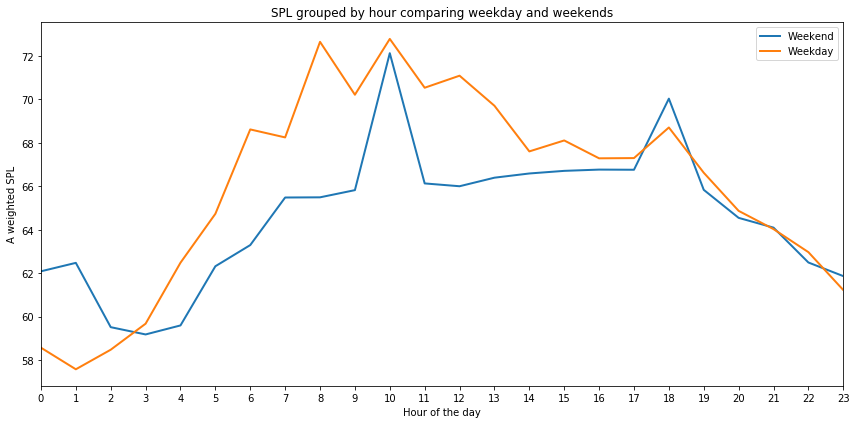

In [13]:
wkend_gb = wkend_df.groupby(wkend_df['hour_of_day'])['dBAS'].apply(calc_leq)
wkday_gb = wkday_df.groupby(wkday_df['hour_of_day'])['dBAS'].apply(calc_leq)

plt.figure(figsize=(12,6))
ax = sns.lineplot(x=wkend_gb.index, y=wkend_gb, linewidth=2)
ax = sns.lineplot(x=wkday_gb.index, y=wkday_gb, linewidth=2)
plt.xlim([wkend_gb.index.min(), wkend_gb.index.max()])
plt.title('SPL grouped by hour comparing weekday and weekends')
plt.xlabel('Hour of the day')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.axvspan(7, 8, alpha=0.5, color='red')
# ax.axvspan(7, 8, alpha=0.5, color='red')
# ax.axvspan(16, 18, alpha=0.5, color='red')
plt.ylabel('A weighted SPL')
plt.legend(['Weekend', 'Weekday'])
plt.tight_layout()
plt.savefig('wkend_wkday_byhour.pdf', format='pdf', dpi=1000, bbox_inches='tight')

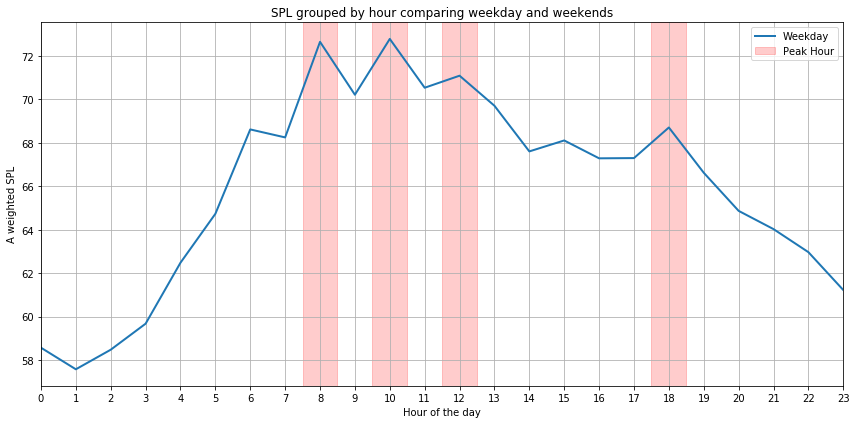

In [28]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x=wkday_gb.index, y=wkday_gb, linewidth=2)
plt.xlim([wkend_gb.index.min(), wkend_gb.index.max()])
plt.title('SPL grouped by hour comparing weekday and weekends')
plt.xlabel('Hour of the day')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.axvspan(7.5, 8.5, alpha=0.2, color='red')
ax.axvspan(9.5, 10.5, alpha=0.2, color='red')
ax.axvspan(11.5, 12.5, alpha=0.2, color='red')
ax.axvspan(17.5, 18.5, alpha=0.2, color='red')
plt.ylabel('A weighted SPL')
plt.legend(['Weekday', 'Peak Hour'])
plt.tight_layout()
# plt.savefig('wkend_wkday_byhour.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.grid()
plt.savefig('peak hour')

So we select the 8am, 10am, 12pm and 6pm as morning, midday and afternoon peak time.

And we use 7:50-8:10, 9:50-10:10, 11:50-12:10, 17:50-18:10 to analyze.

## Peak_Hour_Noise

figure out the minutes range

In [31]:
print("The minute of 7:50:")
print(pd.to_datetime('2019-04-11 07:50:09').hour * 60.0 + pd.to_datetime('2019-04-11 07:50:09').minute)
print("The minute of 8:10:")
print(pd.to_datetime('2019-04-11 08:10:09').hour * 60.0 + pd.to_datetime('2019-04-11 08:10:09').minute)

The minute of 7:50:
470.0
The minute of 8:10:
490.0


In [30]:
print("The minute of 9:50:")
print(pd.to_datetime('2019-04-11 09:50:09').hour * 60.0 + pd.to_datetime('2019-04-11 09:50:09').minute)
print("The minute of 10:10:")
print(pd.to_datetime('2019-04-11 10:10:09').hour * 60.0 + pd.to_datetime('2019-10-11 08:10:09').minute)

The minute of 9:50:
590.0
The minute of 10:10:
610.0


In [32]:
print("The minute of 11:50:")
print(pd.to_datetime('2019-04-11 11:50:09').hour * 60.0 + pd.to_datetime('2019-04-11 11:50:09').minute)
print("The minute of 12:10:")
print(pd.to_datetime('2019-04-11 12:10:09').hour * 60.0 + pd.to_datetime('2019-04-11 12:10:09').minute)

The minute of 11:50:
710.0
The minute of 12:10:
730.0


In [33]:
print("The minute of 17:50:")
print(pd.to_datetime('2019-04-11 17:50:09').hour * 60.0 + pd.to_datetime('2019-04-11 17:50:09').minute)
print("The minute of 18:10:")
print(pd.to_datetime('2019-04-11 18:10:09').hour * 60.0 + pd.to_datetime('2019-04-11 18:10:09').minute)

The minute of 17:50:
1070.0
The minute of 18:10:
1090.0


In [50]:
am_peak_df1 = df[(df.min_of_day<490) & (df.min_of_day>=470)]
am_peak_df2 = df[(df.min_of_day<610) & (df.min_of_day>=590)]
mid_peak_df = df[(df.min_of_day<730) & (df.min_of_day>=710)]
pm_peak_df = df[(df.min_of_day<1090) & (df.min_of_day>=1070)]

Get the second of each record

In [51]:
am_peak_df1['sec_of_day'] = (am_peak_df1.index.hour * 3600.0) + (am_peak_df1.index.minute * 60.0) + am_peak_df1.index.second
am_peak_df2['sec_of_day'] = (am_peak_df2.index.hour * 3600.0) + (am_peak_df2.index.minute * 60.0) + am_peak_df2.index.second
mid_peak_df['sec_of_day'] = (mid_peak_df.index.hour * 3600.0) + (mid_peak_df.index.minute * 60.0) + mid_peak_df.index.second
pm_peak_df['sec_of_day'] = (pm_peak_df.index.hour * 3600.0) + (pm_peak_df.index.minute * 60.0) + pm_peak_df.index.second

/anaconda3/envs/myEnv3/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/myEnv3/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/myEnv3/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [52]:
am_peak_df1.head()

,dBAS,weekday,min_of_day,hour_of_day,sec_of_day
time,,,,,
2019-04-12 07:50:00-04:00,73.99,4,470.0,7,28200.0
2019-04-12 07:50:01-04:00,74.93,4,470.0,7,28201.0
2019-04-12 07:50:02-04:00,75.38,4,470.0,7,28202.0
2019-04-12 07:50:03-04:00,76.93,4,470.0,7,28203.0
2019-04-12 07:50:04-04:00,77.37,4,470.0,7,28204.0


In [54]:
am_peak_min1 = am_peak_df1.groupby(am_peak_df1['min_of_day'])['dBAS'].apply(calc_leq)
am_peak_min2 = am_peak_df2.groupby(am_peak_df2['min_of_day'])['dBAS'].apply(calc_leq)
mid_peak_min = mid_peak_df.groupby(mid_peak_df['min_of_day'])['dBAS'].apply(calc_leq)
pm_peak_min = pm_peak_df.groupby(pm_peak_df['min_of_day'])['dBAS'].apply(calc_leq)

In [55]:
am_peak_sec1 = am_peak_df1.groupby(am_peak_df1['sec_of_day'])['dBAS'].apply(calc_leq)
am_peak_sec2 = am_peak_df2.groupby(am_peak_df2['sec_of_day'])['dBAS'].apply(calc_leq)
mid_peak_sec = mid_peak_df.groupby(mid_peak_df['sec_of_day'])['dBAS'].apply(calc_leq)
pm_peak_sec = pm_peak_df.groupby(pm_peak_df['sec_of_day'])['dBAS'].apply(calc_leq)

In [56]:
am_peak_min1.reset_index(drop = True, inplace = True)
am_peak_min2.reset_index(drop = True, inplace = True)
mid_peak_min.reset_index(drop = True, inplace = True)
pm_peak_min.reset_index(drop = True, inplace = True)

In [57]:
am_peak_sec1.reset_index(drop = True, inplace = True)
am_peak_sec2.reset_index(drop = True, inplace = True)
mid_peak_sec.reset_index(drop = True, inplace = True)
pm_peak_sec.reset_index(drop = True, inplace = True)

In [58]:
am_peak_min1.index.max()

19

In [59]:
am_peak_min1.index*60

RangeIndex(start=0, stop=1200, step=60)

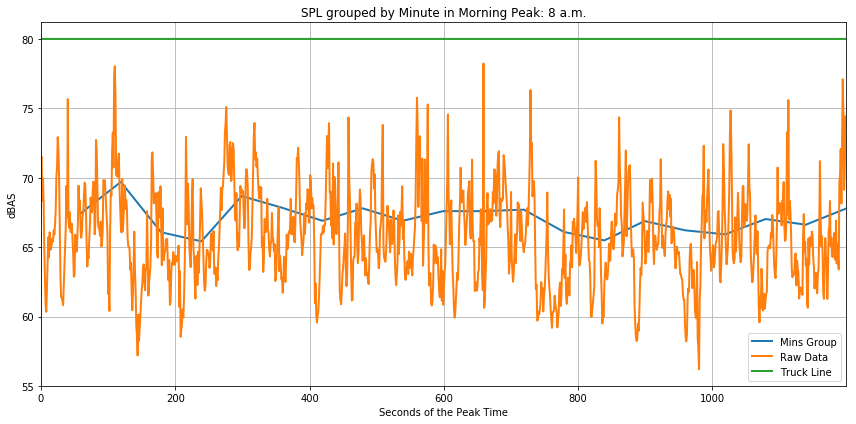

In [65]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(x=(am_peak_min1.index*60+59), y=am_peak_min1, linewidth=2)
ax = sns.lineplot(x=am_peak_sec1.index, y=am_peak_sec1, linewidth=2)
ax = sns.lineplot(x=am_peak_sec1.index, y=80, linewidth=2)

plt.xlim([am_peak_sec1.index.min(), am_peak_sec1.index.max()])


plt.title('SPL grouped by Minute in Morning Peak: 8 a.m.')
plt.xlabel('Seconds of the Peak Time')
plt.ylabel('dBAS')
plt.legend(['Mins Group', 'Raw Data', 'Truck Line'])
plt.tight_layout()
plt.grid()
plt.savefig('SPL grouped by Minute in Morning Peak: 8 a.m.')

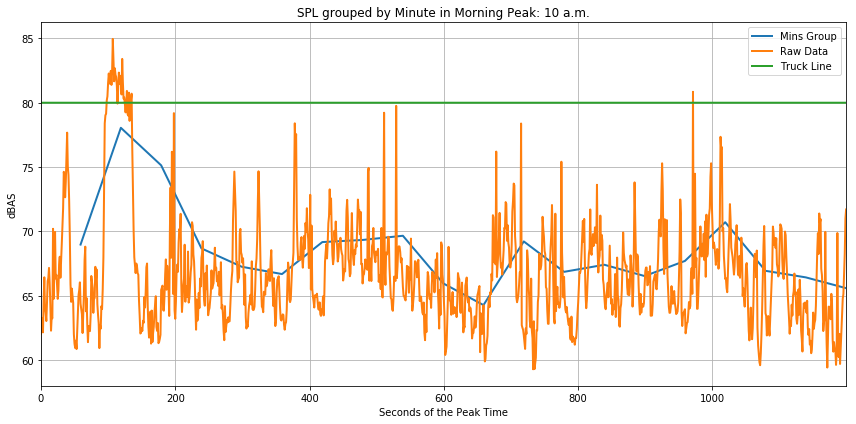

In [66]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(x=(am_peak_min2.index*60+59), y=am_peak_min2, linewidth=2)
ax = sns.lineplot(x=am_peak_sec2.index, y=am_peak_sec2, linewidth=2)
ax = sns.lineplot(x=am_peak_sec2.index, y=80, linewidth=2)

plt.xlim([am_peak_sec2.index.min(), am_peak_sec2.index.max()])


plt.title('SPL grouped by Minute in Morning Peak: 10 a.m.')
plt.xlabel('Seconds of the Peak Time')
plt.ylabel('dBAS')
plt.legend(['Mins Group', 'Raw Data', 'Truck Line'])
plt.tight_layout()
plt.grid()
plt.savefig('SPL grouped by Minute in Morning Peak: 10 a.m.')

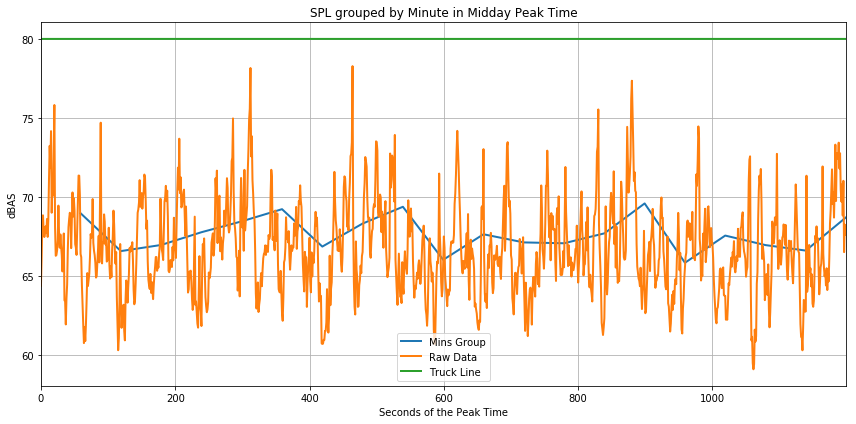

In [67]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(x=(mid_peak_min.index*60+59), y=mid_peak_min, linewidth=2)
ax = sns.lineplot(x=mid_peak_sec.index, y=mid_peak_sec, linewidth=2)
ax = sns.lineplot(x=mid_peak_sec.index, y=80, linewidth=2)

plt.xlim([mid_peak_sec.index.min(), mid_peak_sec.index.max()])


plt.title('SPL grouped by Minute in Midday Peak Time')
plt.xlabel('Seconds of the Peak Time')
plt.ylabel('dBAS')
plt.legend(['Mins Group', 'Raw Data', 'Truck Line'])
plt.tight_layout()
plt.grid()
plt.savefig('SPL grouped by Minute in Midday Peak Time')

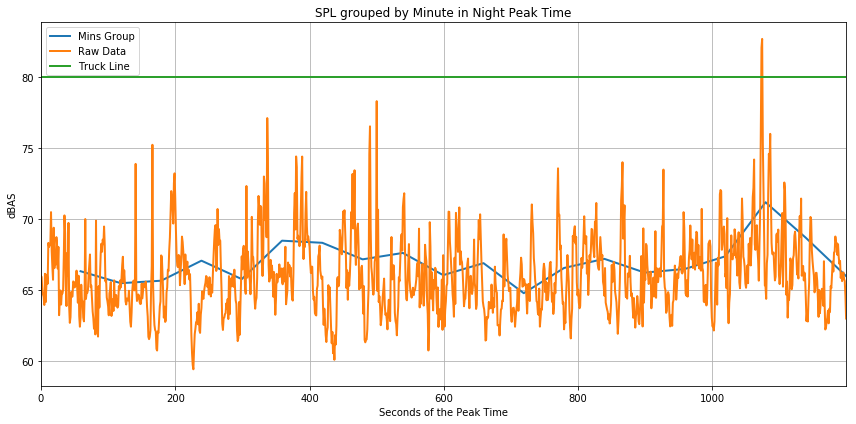

In [69]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(x=(pm_peak_min.index*60+59), y=pm_peak_min, linewidth=2)
ax = sns.lineplot(x=pm_peak_sec.index, y=pm_peak_sec, linewidth=2)
ax = sns.lineplot(x=pm_peak_sec.index, y=80, linewidth=2)

plt.xlim([pm_peak_sec.index.min(), pm_peak_sec.index.max()])


plt.title('SPL grouped by Minute in Night Peak Time')
plt.xlabel('Seconds of the Peak Time')
plt.ylabel('dBAS')
plt.legend(['Mins Group', 'Raw Data', 'Truck Line'])
plt.tight_layout()
plt.grid()
plt.savefig('SPL grouped by Minute in Night Peak Time')